In [3]:
import matplotlib.pyplot as plt
import seaborn as sns;
sns.set()
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

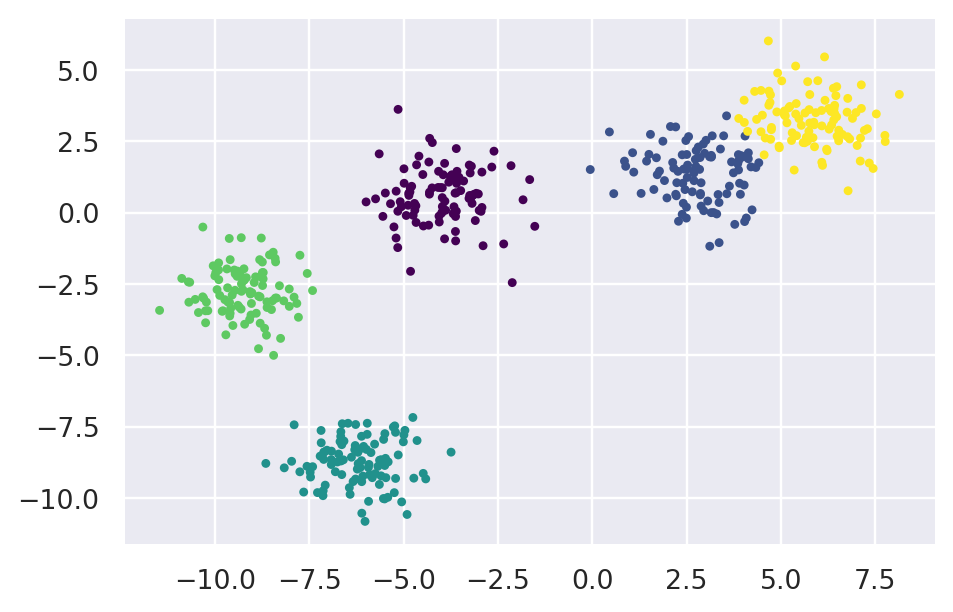

In [7]:
X, y_true = make_blobs(
    n_samples=500, centers=5,
    cluster_std=0.9, random_state=17
)
kmeans = KMeans(5, random_state=420)
labels = kmeans.fit(X).predict(X)
plt.figure(dpi=175)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=7, cmap='viridis')

In [8]:
from sklearn.mixture import GaussianMixture

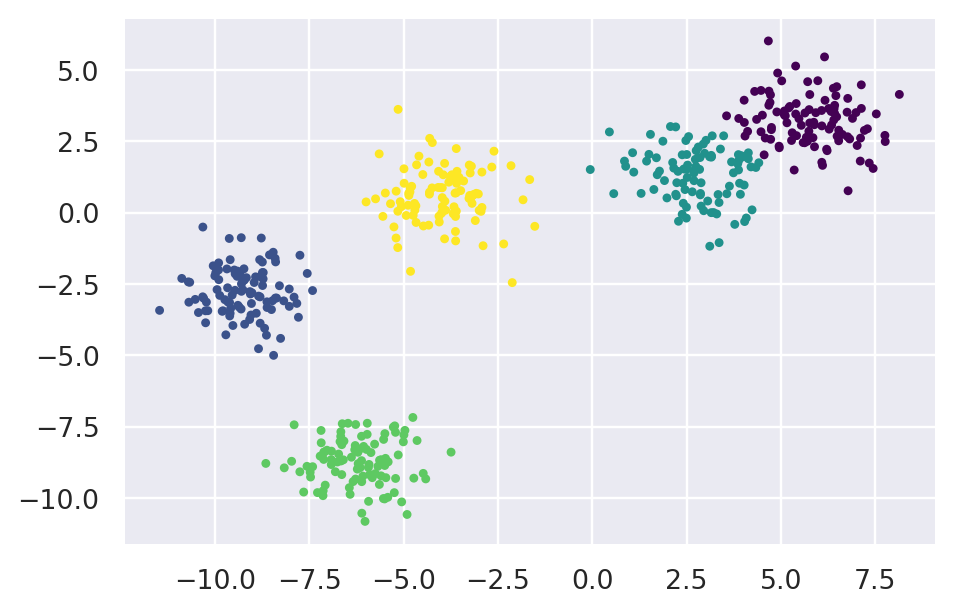

In [9]:
gmm = GaussianMixture(n_components=5).fit(X)
labels = gmm.predict(X)
plt.figure(dpi=175)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=7, cmap='viridis')

In [10]:
probabilities = gmm.predict_proba(X)

In [24]:
from matplotlib.patches import Ellipse 

def plot_gmm(gmm, X, labels=True, ax=None):
    def draw_ellipse(position, covariance, ax=None, **kwargs):
        ax = ax or plt.gca()
        
        if covariance.shape == (2,2):
            U,s, Vt = np.linalg.svd(covariance)
            angle = np.degrees(np.arctan2(U[1,0], U[0,0]))
            width, height = 2 * np.sqrt(s)
        else:
            angle = 0
            width, height = 2 * np.sqrt(covariance)
            
        for nsig in range(1,4):
            ax.add_patch(Ellipse(
                position, nsig * width, nsig * height,
                angle, **kwargs
            ))

    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if labels.any():
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=7, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=7, zorder=2)

    ax.axis('equal')
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=2 * w_factor)

ValueError: alpha (1.966434277550115) is outside 0-1 range

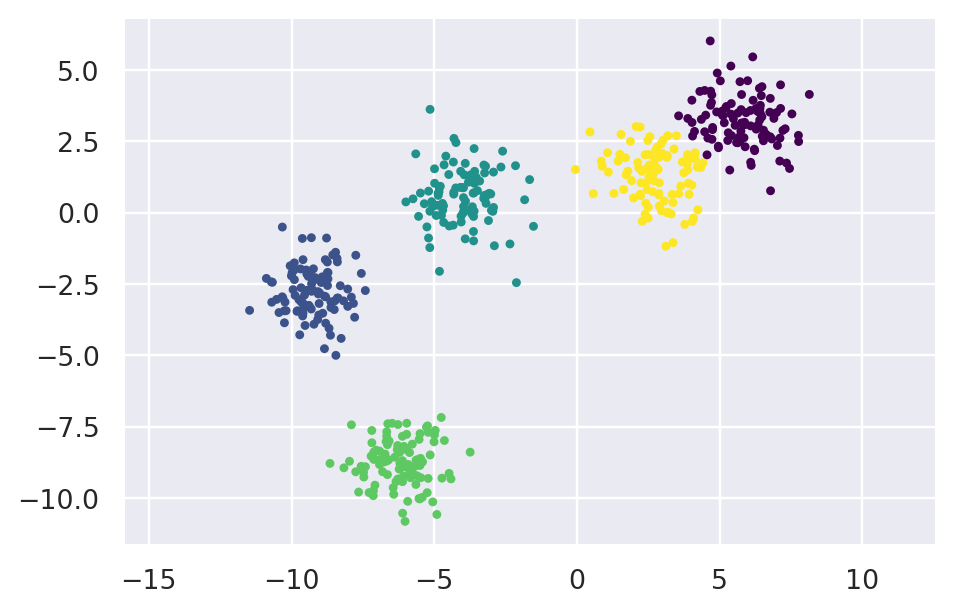

In [27]:
gmm = GaussianMixture(n_components=5, random_state=420)
plt.figure(dpi=175)
plot_gmm(gmm, X)

ValueError: alpha (1.5713393201729293) is outside 0-1 range

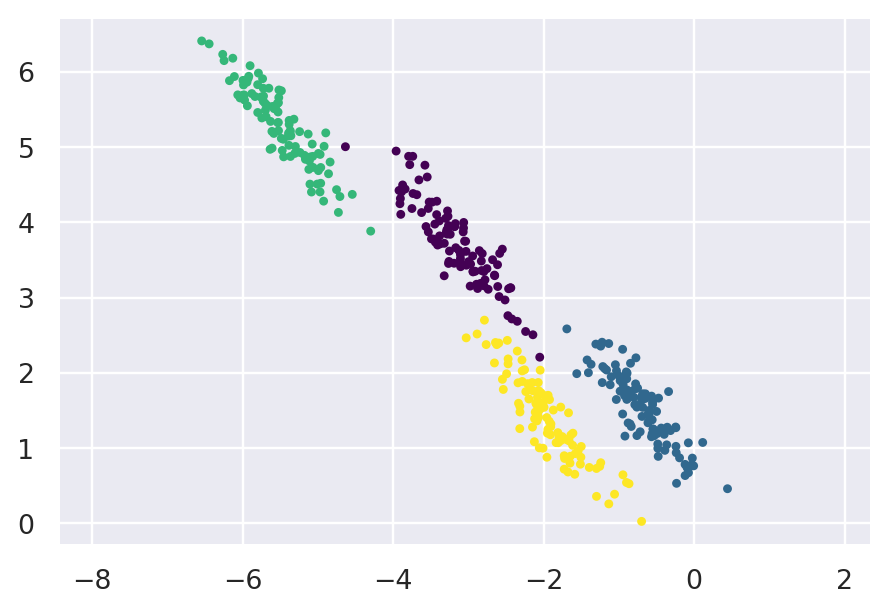

In [28]:
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
X = X[:, ::-1] ## FLip axes for better plotting

rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2,2))

gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
plt.figure(dpi=175)
plot_gmm(gmm, X_stretched)
